# Webscraping!
nothing is private!

_by Emma York_

### Main Topics
- HTML and BeautifulSoup
- Twitter's API 
- Python Reddit API Wrapper

### HTML!!!

HTML stands for Hypertext Markup Language and comprises of different elements layered in tags.
We here we will determine what elements we want to extract and which tags they are located in.

In [1]:
# import necessary libraries

import requests 
import pandas as pd
from bs4 import BeautifulSoup
import re

In [2]:
# pick a URL of your choosing

URL = "https://www.allure.com/gallery/best-of-beauty-skin-care-product-winners"

In [3]:
# use the requests function to fetch documents within the url 

res = requests.get(URL, headers = {'User-agent': 'Your Name Here'})

In [4]:
# check to see if the status code is okay. if 400, NOT GOOD
# 200 means the request was received and understood and being processed

res.status_code

200

In [5]:
html = res.text
html

'<!DOCTYPE html>\n<html lang="en">\n  <head>\n    <meta charset="utf-8"/>\n    <meta http-equiv="X-UA-Compatible" content="IE=edge"/>\n    <title>33 Best Skin-Care Products of 2018 | Best of Beauty Awards | Allure</title>\n    <meta name="msapplication-tap-highlight" content="no"/>\n    <meta name="viewport" content="user-scalable=no, width=device-width, initial-scale=1, maximum-scale=1"/>\n    <link rel="shortcut icon" href="/favicon.ico" type="image/x-icon"/>\n    <meta name="author" content="Liana Schaffner ,Jess Bonham"/>\n    <meta name="copyright" content="Copyright (c) Cond&amp;#233; Nast 2018"/>\n    <meta name="description" content="The &quot;Skin Care&quot; category of our Best of Beauty Awards is ultra-competitive, but we narrowed it down to 2018&#x27;s winning cleansers, moisturizers, eye creams, peels, masks, and more. Brighter, smoother, and more radiant: Meet the bottled superstars that&#x27;ll get your complexion there."/>\n    <link rel="amphtml" href="https://www.allu

In [6]:
# gross! let's clean that up with beautiful soup!
# lxml is a parser, gets rid of line breaks

soup = BeautifulSoup(html, 'lxml')

<br>
***Let's go to - https://www.allure.com/gallery/best-of-beauty-skin-care-product-winners ***

<br>
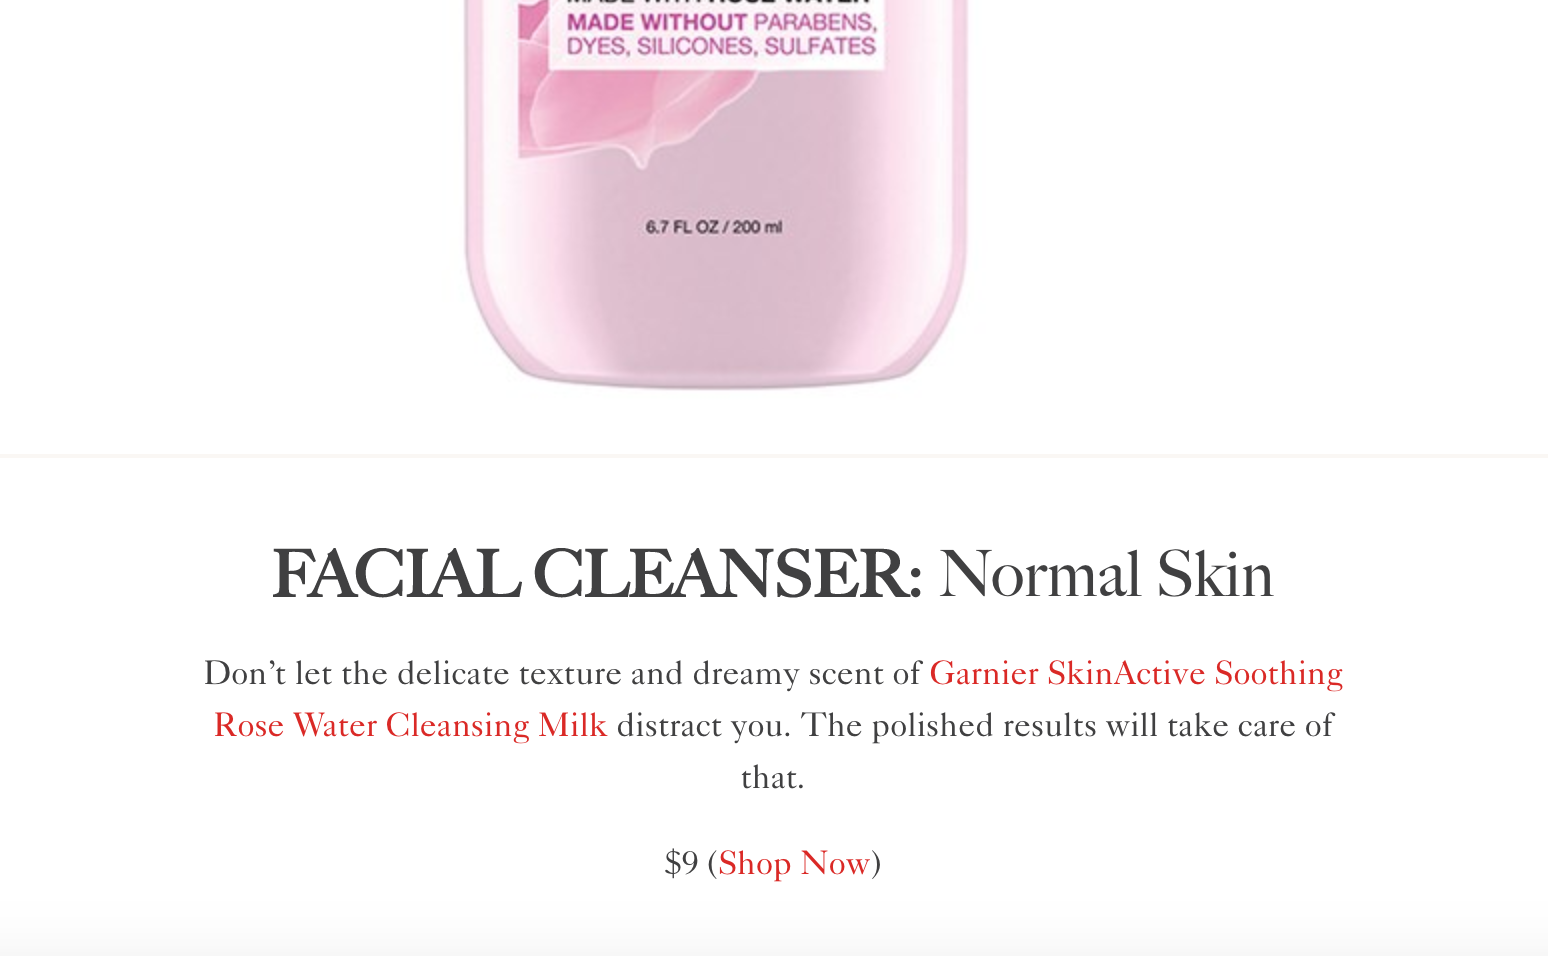
<br>

Highlight and right-click on the item of interest. In this case, it is "FACIAL CLEANSER: Normal Skin"

<br>
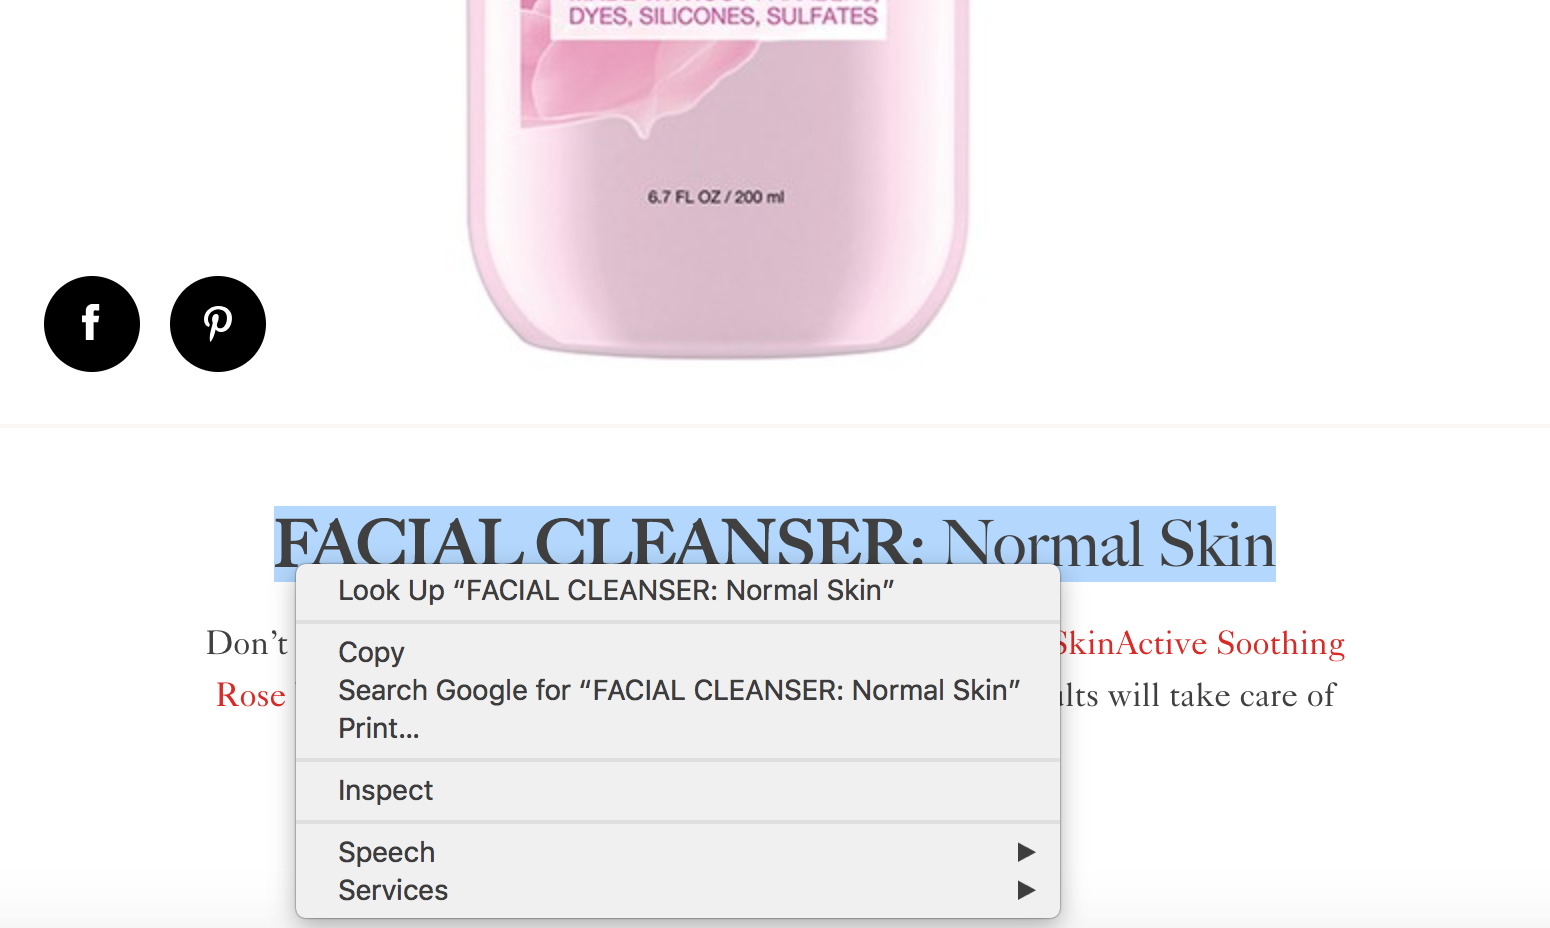
<br>

Click inspect and viola! #hacked

<br>
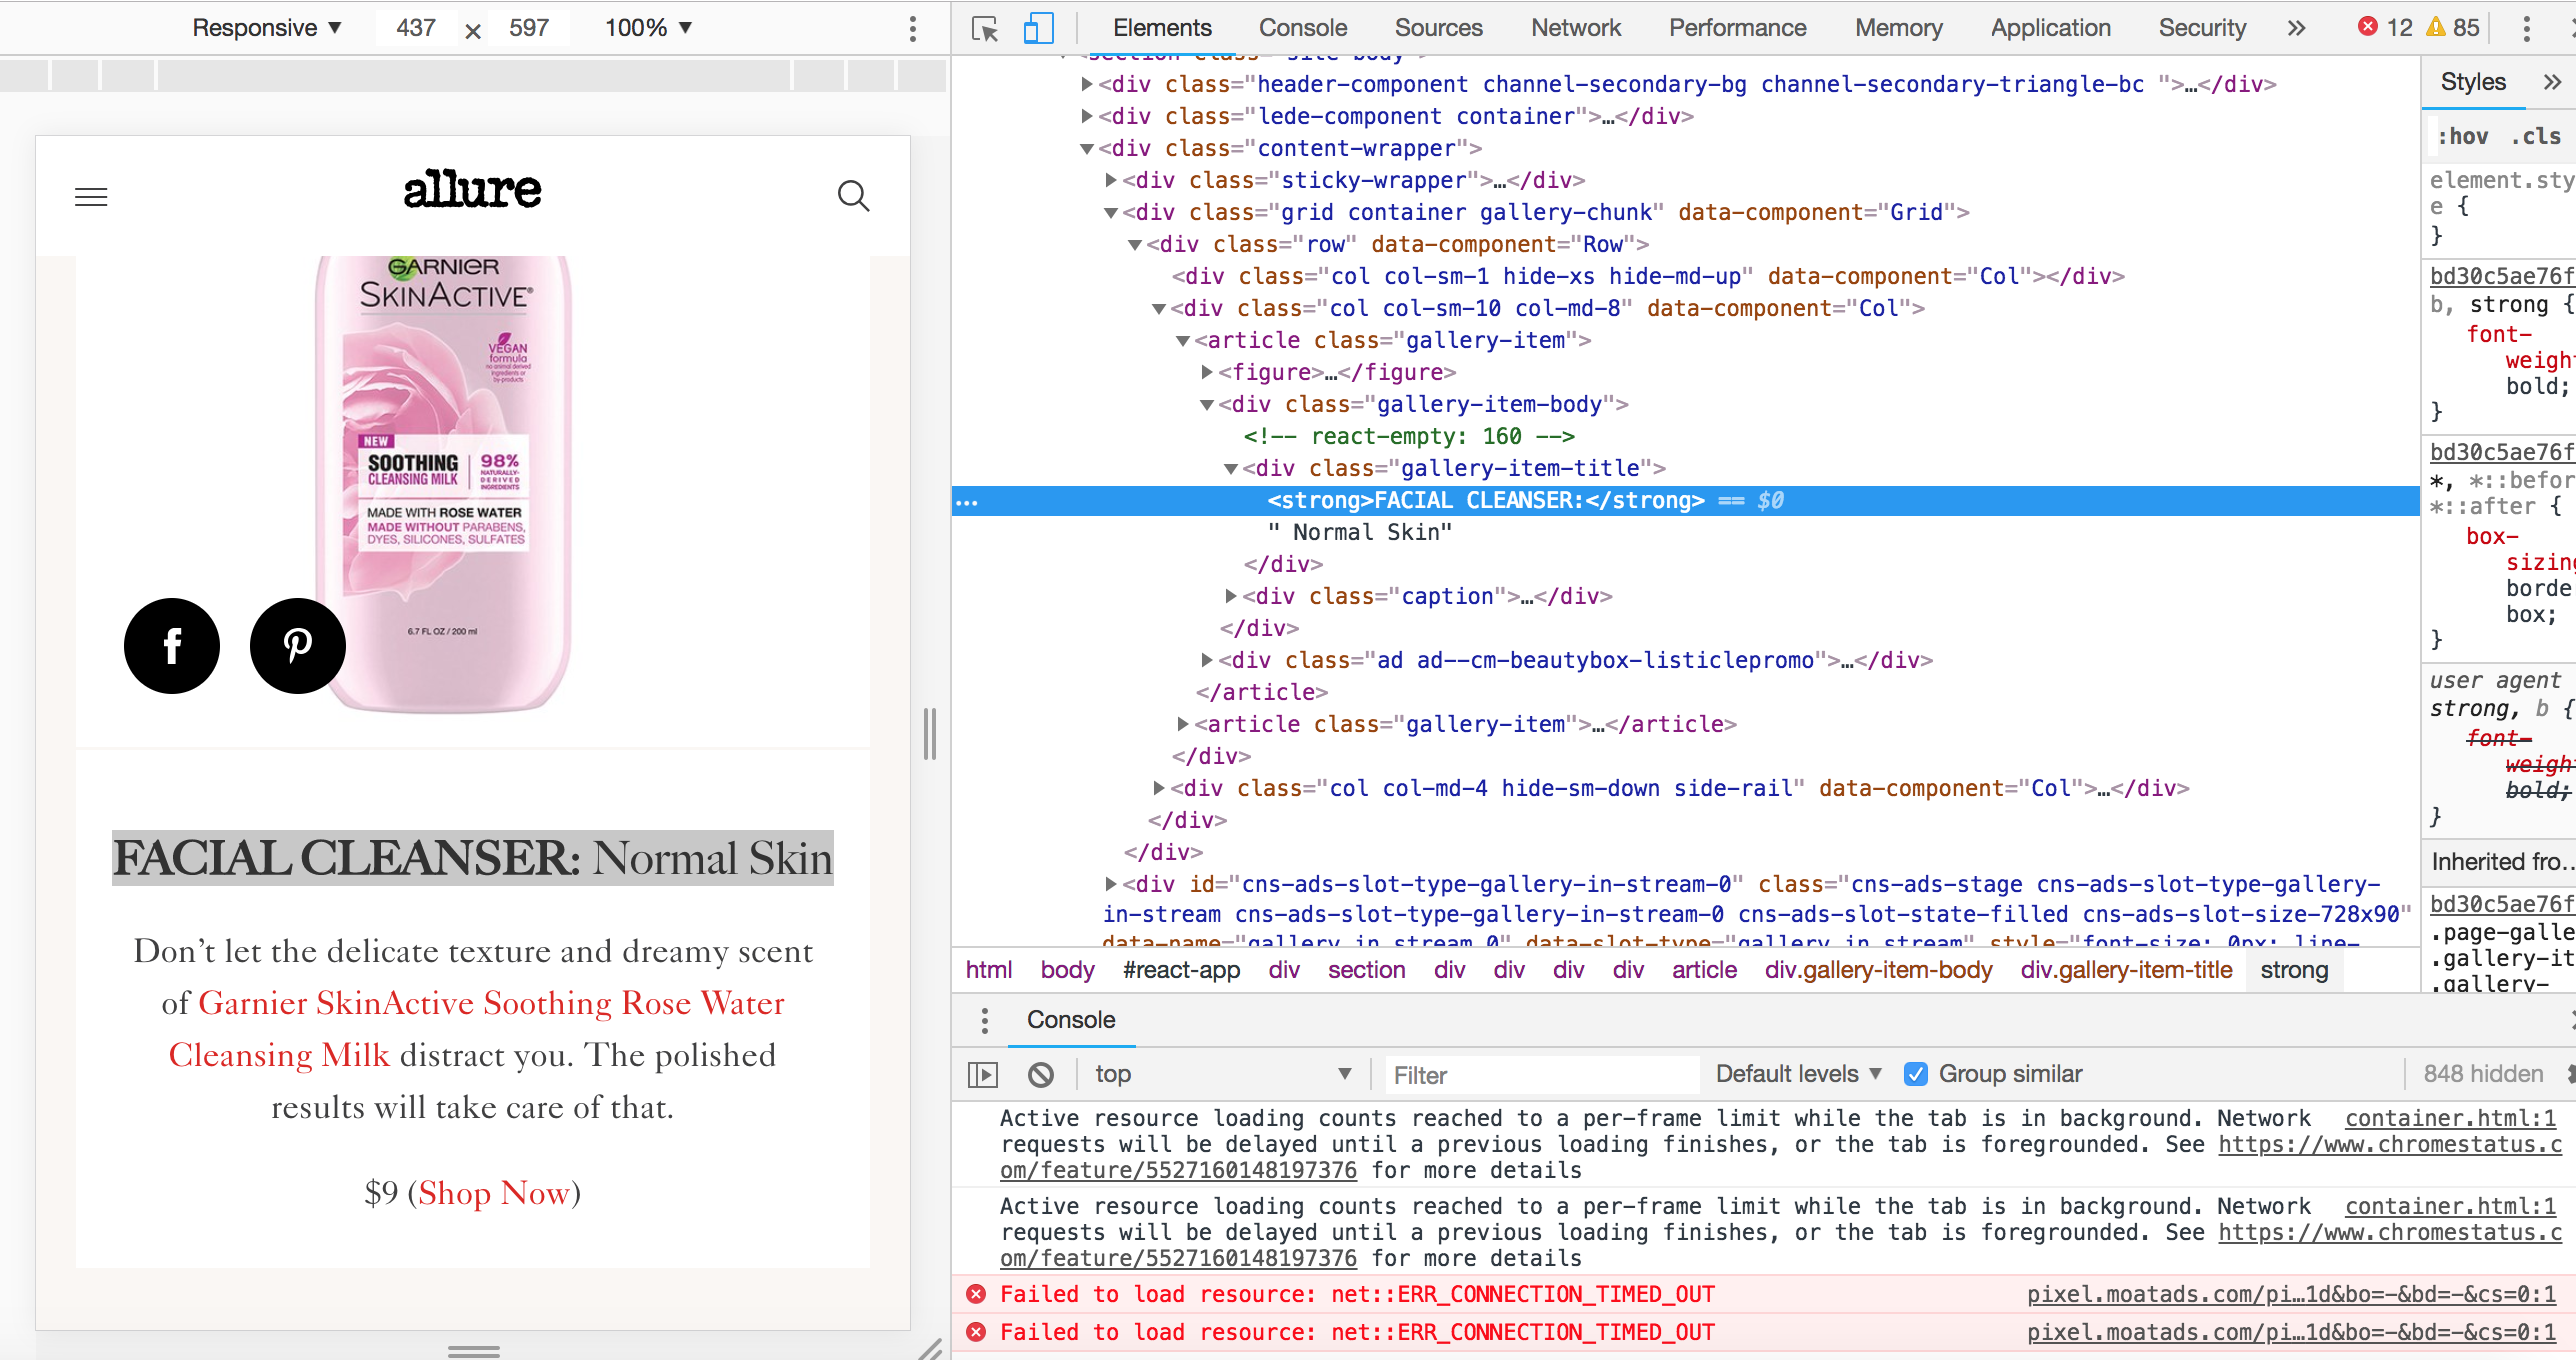
<br>

The item of interest will be highlighted. From there, you can locate the associated class to pull it out.

<br>
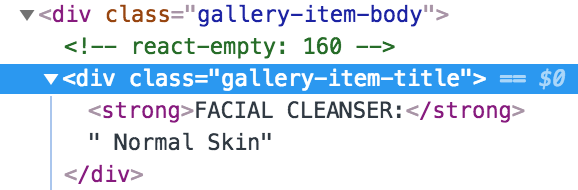
<br>

<br>

In [7]:
# looking at the webpage, we can see the product type is located in the below class

product_type = soup.find_all('div', {'class': 'gallery-item-title'})       

In [8]:
# Let's check!

product_type[0].text

'FACIAL CLEANSER: Normal Skin'

In [9]:
# great! let's use list comprehension to find all of them

product_type_text = [i.text for i in product_type]

product_type_text

['FACIAL CLEANSER: Normal Skin',
 'FACIAL CLEANSER: Oily Skin',
 'FACIAL CLEANSER: Dry Skin',
 'FACIAL CLEANSER: Cleansing Wipes',
 'TONER / ESSENCE',
 'FACIAL MIST',
 'FACIAL OIL',
 'FACIAL SERUM: Antioxidant',
 'FACIAL SERUM: Antioxidant',
 'FACIAL SERUM: Clarifying',
 'FACIAL SERUM: Calming',
 'FACIAL SERUM: Retinol',
 'FACIAL SERUM: Hydrating',
 'FACIAL MOISTURIZER: Normal Skin',
 'FACIAL MOISTURIZER: Oily Skin',
 'FACIAL MOISTURIZER: Dry Skin',
 'EYE CREAM: Line-Smoothing',
 'EYE CREAM: Line-Smoothing',
 'EYE CREAM: Depuffing',
 'EYE CREAM: Moisturizing',
 'EYE CREAM: Moisturizing',
 'FACIAL SCRUB',
 'MASK: Oily Skin',
 'MASK: Dull Skin',
 'MASK: Dry Skin',
 'MASK: Eye Area',
 'MASK: Sheet',
 'MASK: Overnight',
 'FACIAL SUNSCREEN',
 'FACIAL SUNSCREEN',
 'PEEL',
 'ACNE: Allover Treatment',
 'ACNE: Spot Treatment']

### Now let's get the name of the product!


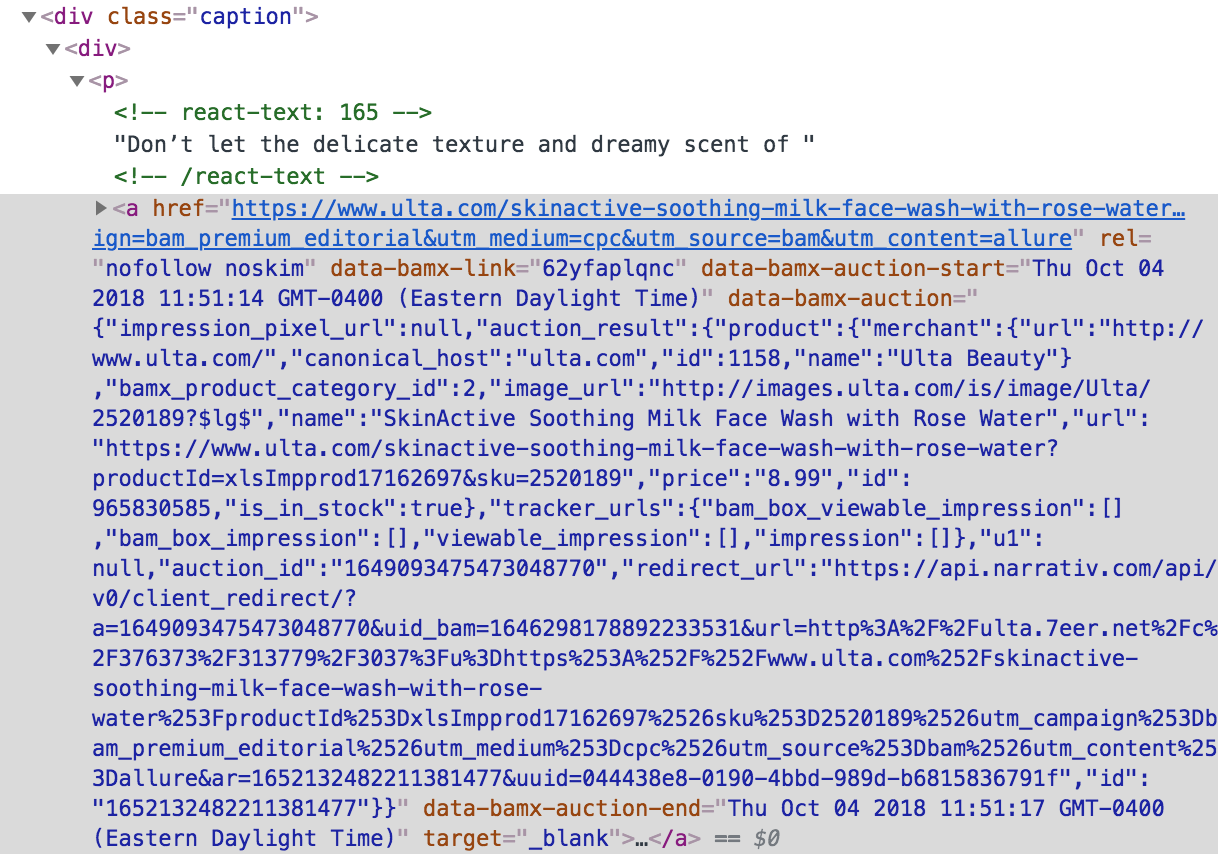


In [10]:
# going back to the webpage, we see that the product name is located in the class = caption

product_name = soup.find_all('div', {'class': 'caption'})

In [11]:
# let's check! 

product_name[0].text

'Don’t let the delicate texture and dreamy scent of Garnier SkinActive Soothing Rose Water Cleansing Milk distract you. The polished results will take care of that.$9 (Shop Now)'

In [12]:
# we can see that the product name is located within rel="nofollow"

product_name[0].find('a', {'rel': 'nofollow'}).text

'Garnier SkinActive Soothing Rose Water Cleansing Milk'

In [13]:
# great! let's check the length for our loop

len(product_name)

34

In [14]:
# double check the last one to make sure it didn't grab anything else by accident

product_name[33].text

'See more categories >'

In [15]:
# let's create a list of the product names!

product_name_text = [product_name[i].find('a', {'rel': 'nofollow'}).text for i in range(0,33)]
product_name_text

['Garnier SkinActive Soothing Rose Water Cleansing Milk',
 'Tatcha The Deep Cleanse',
 'L’Occitane Shea 3-in-1 Cleansing Water',
 'Burt’s Bees Micellar Cleansing Towelettes',
 'Lumene Valo Glow Lumenessence Brightening Beauty Lotion',
 'Mario Badescu Facial Spray with Aloe, Chamomile and Lavender',
 'Honest Beauty Magic Organic Beauty Facial Oil',
 'Clinique Fresh Pressed Daily Booster with Pure Vitamin C 10%',
 'Korres Wild Rose Spotless Serum 15% Vitamin C',
 'Caudalie Vinopure Skin Perfecting Serum',
 'Dr. Jart+ Cicapair Tiger Grass Re.Pair Serum',
 'Neutrogena Rapid Wrinkle Repair Serum',
 'Paula’s Choice Resist Omega+ Complex Serum',
 'Olay Luminous Whip',
 'Ole Henriksen Counter Balance Oil Control Hydrator',
 'Clinique Moisture Surge 72-Hour Auto-Replenishing Hydrator',
 'StriVectin Multi-Action R&R Eye Cream',
 'RoC Retinol Correxion Sensitive Eye Cream',
 'Dr. Brandt Needles No More No More Baggage',
 'Rodan + Fields Enhancements Active Hydration Bright Eye Complex',
 'Laneige

In [16]:
# let's get the price as well! (this cell is redundant, I know)

price = [price.text for price in product_name]
price[0]

'Don’t let the delicate texture and dreamy scent of Garnier SkinActive Soothing Rose Water Cleansing Milk distract you. The polished results will take care of that.$9 (Shop Now)'

### Let's use RegEx!

In [17]:
# \$ = finds the $ sign
# \d. = finds a digit 0-9, . matches case literally
# + accounts for additional digits 

re.findall('\$[\d.]+', price[0])

['$9']

In [18]:
# repeat this for all products

price = [re.findall('\$[\d.]+', price[i]) for i in range(0,33)]
price

[['$9'],
 ['$38'],
 ['$24'],
 ['$6'],
 ['$15'],
 ['$12'],
 ['$28'],
 ['$77'],
 ['$75'],
 ['$49'],
 ['$46'],
 ['$22'],
 ['$36'],
 ['$30'],
 ['$55'],
 ['$19'],
 ['$65'],
 ['$23'],
 ['$42'],
 ['$70'],
 ['$34'],
 ['$32'],
 ['$9'],
 ['$69'],
 ['$45'],
 ['$60'],
 ['$3'],
 ['$14'],
 ['$32'],
 ['$33'],
 ['$48'],
 ['$5'],
 ['$22']]

In [19]:
# perfect! except it's a list of list and we don't want that 

price = [str(x) for [x] in price]

price

['$9',
 '$38',
 '$24',
 '$6',
 '$15',
 '$12',
 '$28',
 '$77',
 '$75',
 '$49',
 '$46',
 '$22',
 '$36',
 '$30',
 '$55',
 '$19',
 '$65',
 '$23',
 '$42',
 '$70',
 '$34',
 '$32',
 '$9',
 '$69',
 '$45',
 '$60',
 '$3',
 '$14',
 '$32',
 '$33',
 '$48',
 '$5',
 '$22']

In [20]:
# let's turn it into a dataframe!

df = pd.DataFrame(
    {'Product Type': product_type_text,
     'Product Name': product_name_text,
     'Price': price
    })

df.head()

Product Type  \
0      FACIAL CLEANSER: Normal Skin   
1        FACIAL CLEANSER: Oily Skin   
2         FACIAL CLEANSER: Dry Skin   
3  FACIAL CLEANSER: Cleansing Wipes   
4                   TONER / ESSENCE   

                                        Product Name Price  
0  Garnier SkinActive Soothing Rose Water Cleansi...    $9  
1                            Tatcha The Deep Cleanse   $38  
2             L’Occitane Shea 3-in-1 Cleansing Water   $24  
3          Burt’s Bees Micellar Cleansing Towelettes    $6  
4  Lumene Valo Glow Lumenessence Brightening Beau...   $15

In [ ]:
# # to split up the product type and the subcategory -

# df[['Product Type', 'Product SubType']] = df['Product Type'].str.split(': ', expand = True)
# df.head()

<img src="twitter-company-statistics.jpg" height="100">

# Twitter APIs!

In [ ]:
!pip install python-twitter
!pip install tweepy

In [21]:
import numpy as np

## Let's make an app!

https://apps.twitter.com/

you need a twitter account to use this. No minimum followers or anything though!

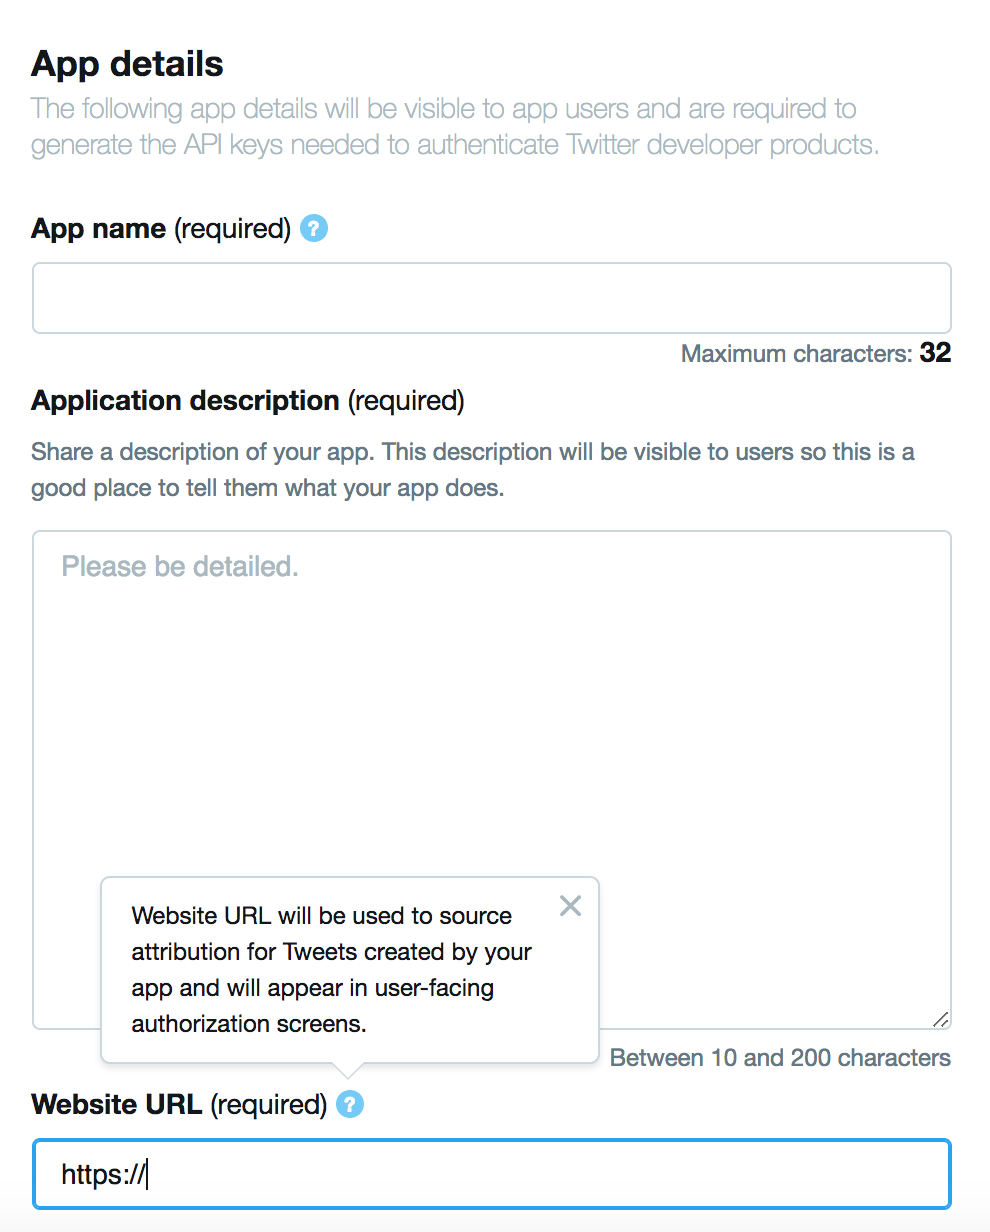

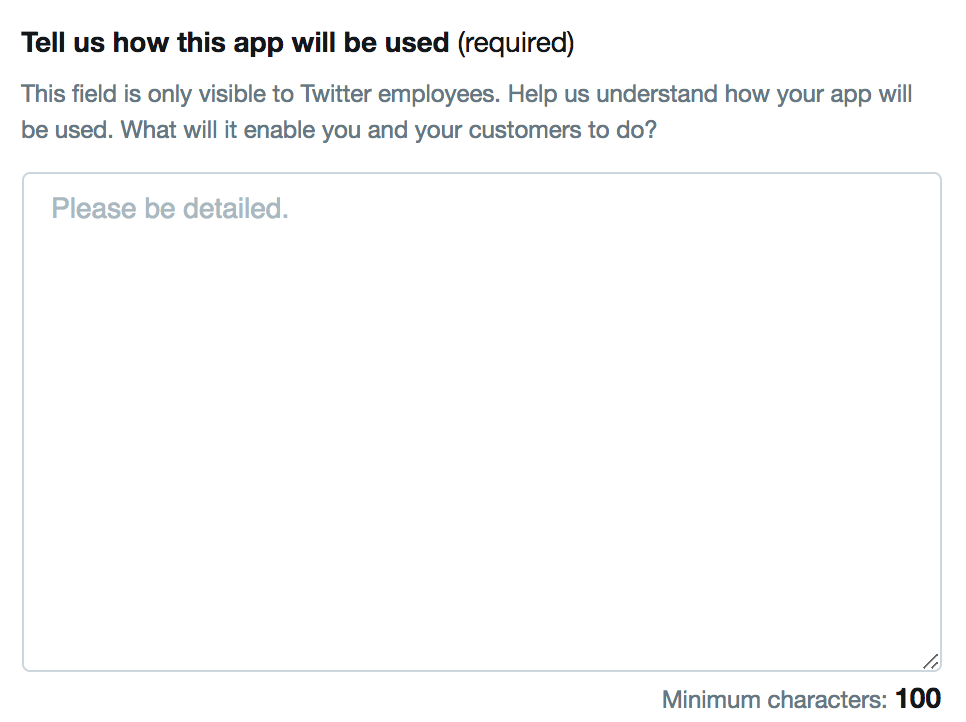

<br>
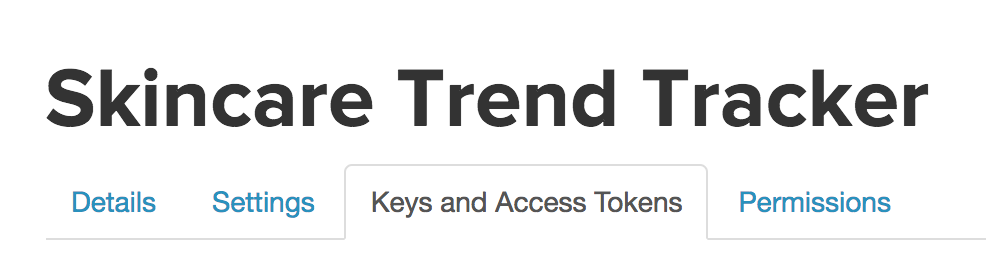

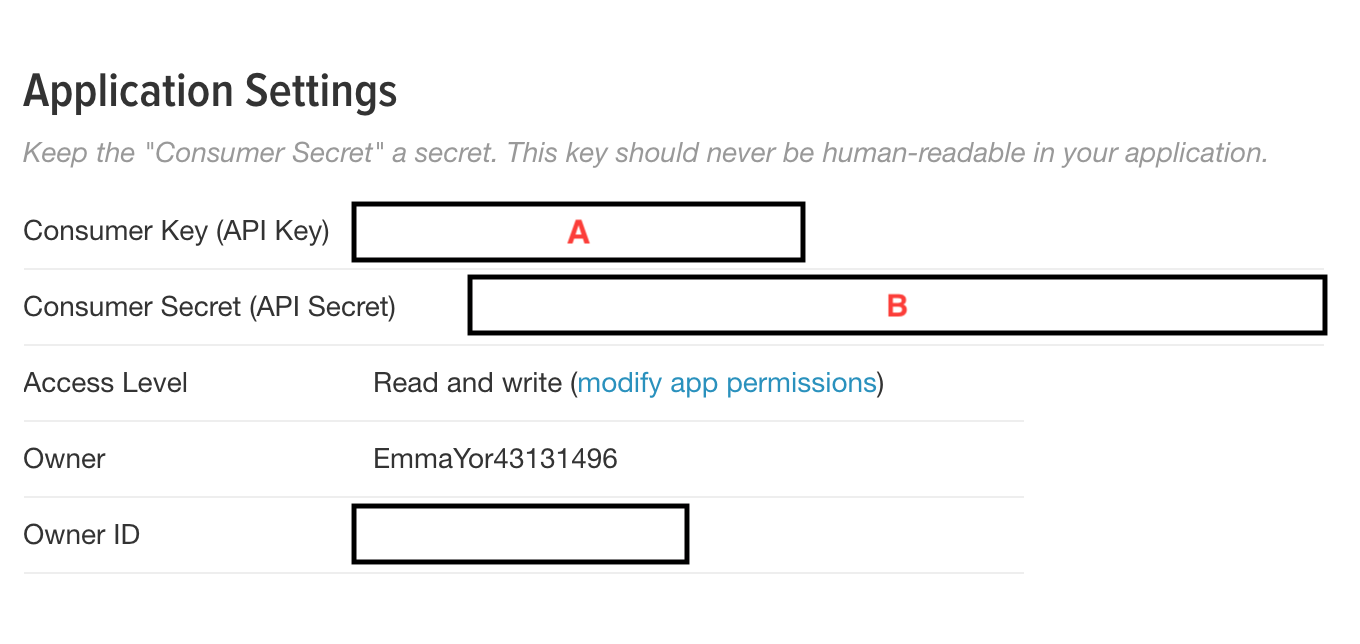

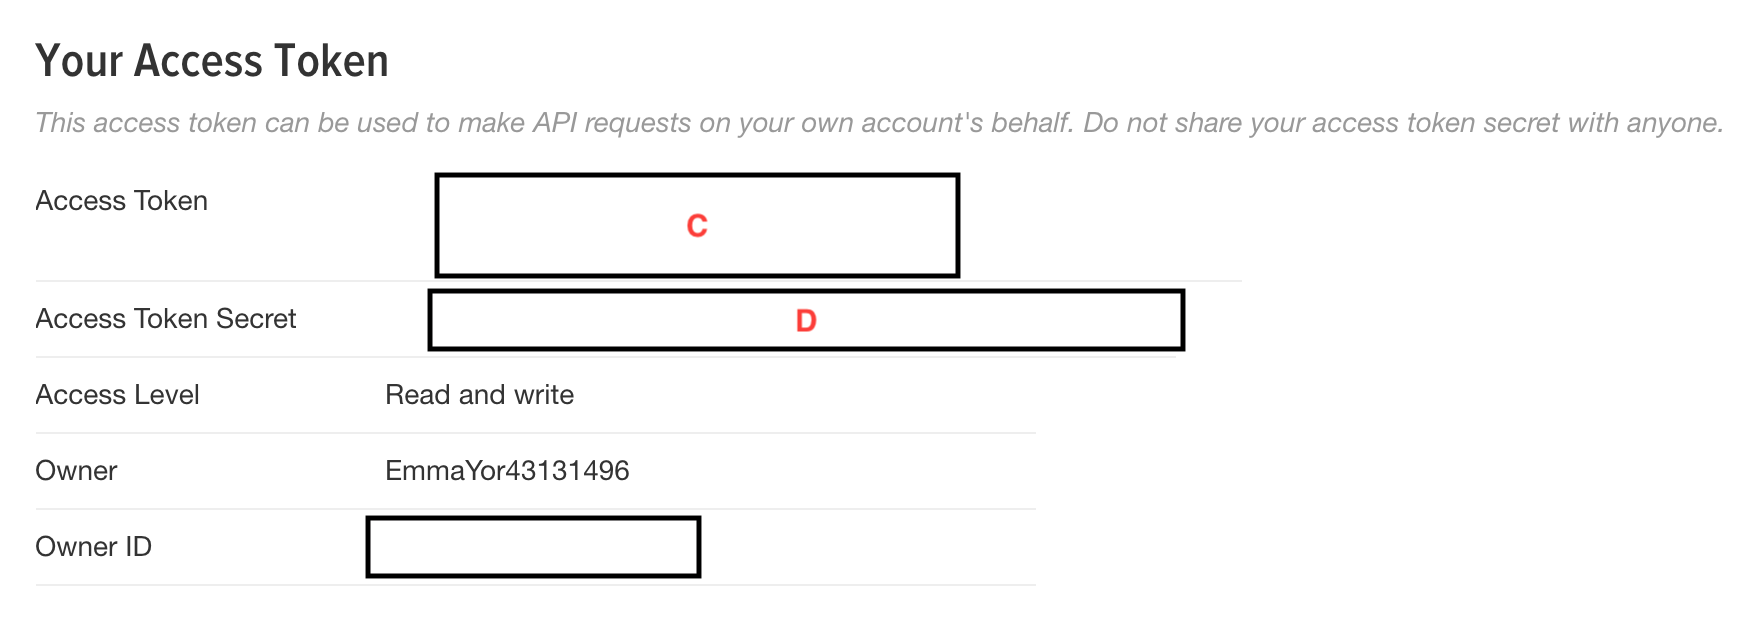
<br>

In [ ]:
consumer_key = 'a'
consumer_secret = "b"
access_token = 'c'
access_secret = 'd'

In [23]:
import tweepy # api wrapper, it's great!

# creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# setting access token and secret
auth.set_access_token(access_token, access_secret)

# creating the API object while passing in auth information
# the wait on rate avoids asking too much of twitter
api = tweepy.API(auth, 
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

In [24]:
# You can check how many queries you have left using rate_limit_status() method

api.rate_limit_status()['resources']['search']

{'/search/tweets': {'limit': 180, 'remaining': 180, 'reset': 1538747635}}

In [25]:
# specify the twitter account you'd like to use
name = "Sephora"

# Number of tweets to pull
tweetCount = 200

# Calling the user_timeline function with our parameters
results = api.user_timeline(id=name, count=tweetCount, include_rts = False)

In [26]:
# put this information into a dataframe

import pandas as pd
sephora = pd.DataFrame(data=[tweet.text for tweet in results],
                       columns = ['Tweets'])
sephora.head()

Tweets
0  @MsBlueLipstick Yes, these are available in li...
1  @bad_elyn so that we can help you.  You can al...
2  @bad_elyn Happy Birthday! You will be prompted...
3  @rockylamb_ We do not have a restock date avai...
4  @rockylamb_ We're sorry about that! The email ...

In [27]:
# shows us all options in the dataframe (potential columns!)

dir(results[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'author',
 'contributors',
 'coordinates',
 'created_at',
 'destroy',
 'entities',
 'favorite',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'parse',
 'parse_list',
 'place',
 'retweet',
 'retweet_count',
 'retweeted',
 'retweets',
 'source',
 'source_url',
 'text',
 'truncated',
 'user']

In [28]:
# let's make some columns!

sephora['ID'] = np.array([tweet.id for tweet in results])
sephora['Date'] = np.array([tweet.created_at for tweet in results])
sephora['Source'] = np.array([tweet.source for tweet in results])
sephora['Likes'] = np.array([tweet.favorite_count for tweet in results])
sephora['RTs'] = np.array([tweet.retweet_count for tweet in results])
sephora['Length'] = np.array([len(tweet.text) for tweet in results])

sephora.head()

Tweets                   ID  \
0  @MsBlueLipstick Yes, these are available in li...  1048198904288665600   
1  @bad_elyn so that we can help you.  You can al...  1048062340761964544   
2  @bad_elyn Happy Birthday! You will be prompted...  1048062324043538433   
3  @rockylamb_ We do not have a restock date avai...  1048057657808977921   
4  @rockylamb_ We're sorry about that! The email ...  1048054834497089536   

                 Date         Source  Likes  RTs  Length  
0 2018-10-05 13:11:08  Lithium Tech.      0    0      63  
1 2018-10-05 04:08:28  Lithium Tech.      1    0     124  
2 2018-10-05 04:08:24  Lithium Tech.      1    0     140  
3 2018-10-05 03:49:52  Lithium Tech.      0    0     119  
4 2018-10-05 03:38:39  Lithium Tech.      1    0     140

In [29]:
# set the index to the DateTime

sephora.set_index('Date', inplace=True)

sephora.head()

Tweets  \
Date                                                                     
2018-10-05 13:11:08  @MsBlueLipstick Yes, these are available in li...   
2018-10-05 04:08:28  @bad_elyn so that we can help you.  You can al...   
2018-10-05 04:08:24  @bad_elyn Happy Birthday! You will be prompted...   
2018-10-05 03:49:52  @rockylamb_ We do not have a restock date avai...   
2018-10-05 03:38:39  @rockylamb_ We're sorry about that! The email ...   

                                      ID         Source  Likes  RTs  Length  
Date                                                                         
2018-10-05 13:11:08  1048198904288665600  Lithium Tech.      0    0      63  
2018-10-05 04:08:28  1048062340761964544  Lithium Tech.      1    0     124  
2018-10-05 04:08:24  1048062324043538433  Lithium Tech.      1    0     140  
2018-10-05 03:49:52  1048057657808977921  Lithium Tech.      0    0     119  
2018-10-05 03:38:39  1048054834497089536  Lithium Tech.      1    0     140

In [30]:
# we search for tweets that have particular words in them!

sephora[sephora['Tweets'].str.contains('new')]

Tweets  \
Date                                                                     
2018-10-04 21:57:05  💎Meet the new crown jewels in your @HUDABEAUTY...   
2018-10-04 01:19:16  @ShevonAshley Stay tuned on the site here for ...   
2018-10-02 23:27:06  Yes way, Jouer 🤩\nMeet @JouerCosmetics’ new Es...   
2018-10-02 20:40:56  @karla56783 Hi there, this can not be manually...   
2018-10-01 21:43:29  @chew_beccaa We're so sorry to hear that! We k...   
2018-10-01 18:49:03  @Laiksee Thank you for your interest in Sephor...   

                                      ID              Source  Likes  RTs  \
Date                                                                       
2018-10-04 21:57:05  1047968876812632064  Twitter Web Client    225   23   
2018-10-04 01:19:16  1047657370413817856       Lithium Tech.      0    0   
2018-10-02 23:27:06  1047266757084250112  Twitter Web Client    144   11   
2018-10-02 20:40:56  1047224937713295360       Lithium Tech.      0    0   
2018-10-01 21:43:29  1046878291687178240       Lithium Tech.      0    0   
2018-10-01 18:49:03  1046834394957152256       Lithium Tech.      1    0   

                     Length  
Date                         
2018-10-04 21:57:05     140  
2018-10-04 01:19:16     102  
2018-10-02 23:27:06     140  
2018-10-02 20:40:56     139  
2018-10-01 21:43:29     140  
2018-10-01 18:49:03     140

In [31]:
# we can look at only tweets with more than 100 likes (typically responses to compaints don't get that many likes)

sephora[sephora['Likes'] > 100]

Tweets  \
Date                                                                     
2018-10-04 21:57:05  💎Meet the new crown jewels in your @HUDABEAUTY...   
2018-10-04 20:09:10                         👽🛸 https://t.co/pbPT6bHuby   
2018-10-03 23:53:49  Roses are red 🌹\nViolets are blue 💙\n@FreshBea...   
2018-10-03 21:48:39                       🍂✨❤️ https://t.co/vf980Me5JY   
2018-10-03 19:34:28  How many shades of 💄 do we need? The limit doe...   
2018-10-02 23:27:06  Yes way, Jouer 🤩\nMeet @JouerCosmetics’ new Es...   
2018-10-02 20:11:38                        💚💛💙 https://t.co/P43WIpxZN2   
2018-10-01 19:38:59  Think you have what it takes to be the future ...   
2018-10-01 16:40:39                         💧✨ https://t.co/FMGmh9aECQ   

                                      ID              Source  Likes  RTs  \
Date                                                                       
2018-10-04 21:57:05  1047968876812632064  Twitter Web Client    225   23   
2018-10-04 20:09:10  1047941719348535296  Twitter Web Client    117    7   
2018-10-03 23:53:49  1047635866481348608  Twitter Web Client    249   32   
2018-10-03 21:48:39  1047604366260101120  Twitter Web Client    362   28   
2018-10-03 19:34:28  1047570599386595328  Twitter Web Client    607  162   
2018-10-02 23:27:06  1047266757084250112  Twitter Web Client    144   11   
2018-10-02 20:11:38  1047217566471471104  Twitter Web Client    146   11   
2018-10-01 19:38:59  1046846962312437760  Twitter Web Client    106   16   
2018-10-01 16:40:39  1046802079946178567  Twitter Web Client    160    8   

                     Length  
Date                         
2018-10-04 21:57:05     140  
2018-10-04 20:09:10      26  
2018-10-03 23:53:49     134  
2018-10-03 21:48:39      28  
2018-10-03 19:34:28      82  
2018-10-02 23:27:06     140  
2018-10-02 20:11:38      27  
2018-10-01 19:38:59     140  
2018-10-01 16:40:39      26

<img src="reddit_logo_640.0.jpg" width="500" height="500">

# Reddit time!

#### We are going to use something called PRAW

PRAW - Python Reddit API Wrapper - is a python package that allows for simple access to Reddit's API. PRAW aims to be easy to use and internally follows all of Reddit's API rules.

In [ ]:
!pip3 install praw

In [32]:
import pandas as pd
import praw

## Let's make that app!

1. Log into your reddit account (you can make a throwaway)
2. Go to your preferences, then click the 'apps' tag at the top of the page
3. Click 'Create an App' at the bottom of the page

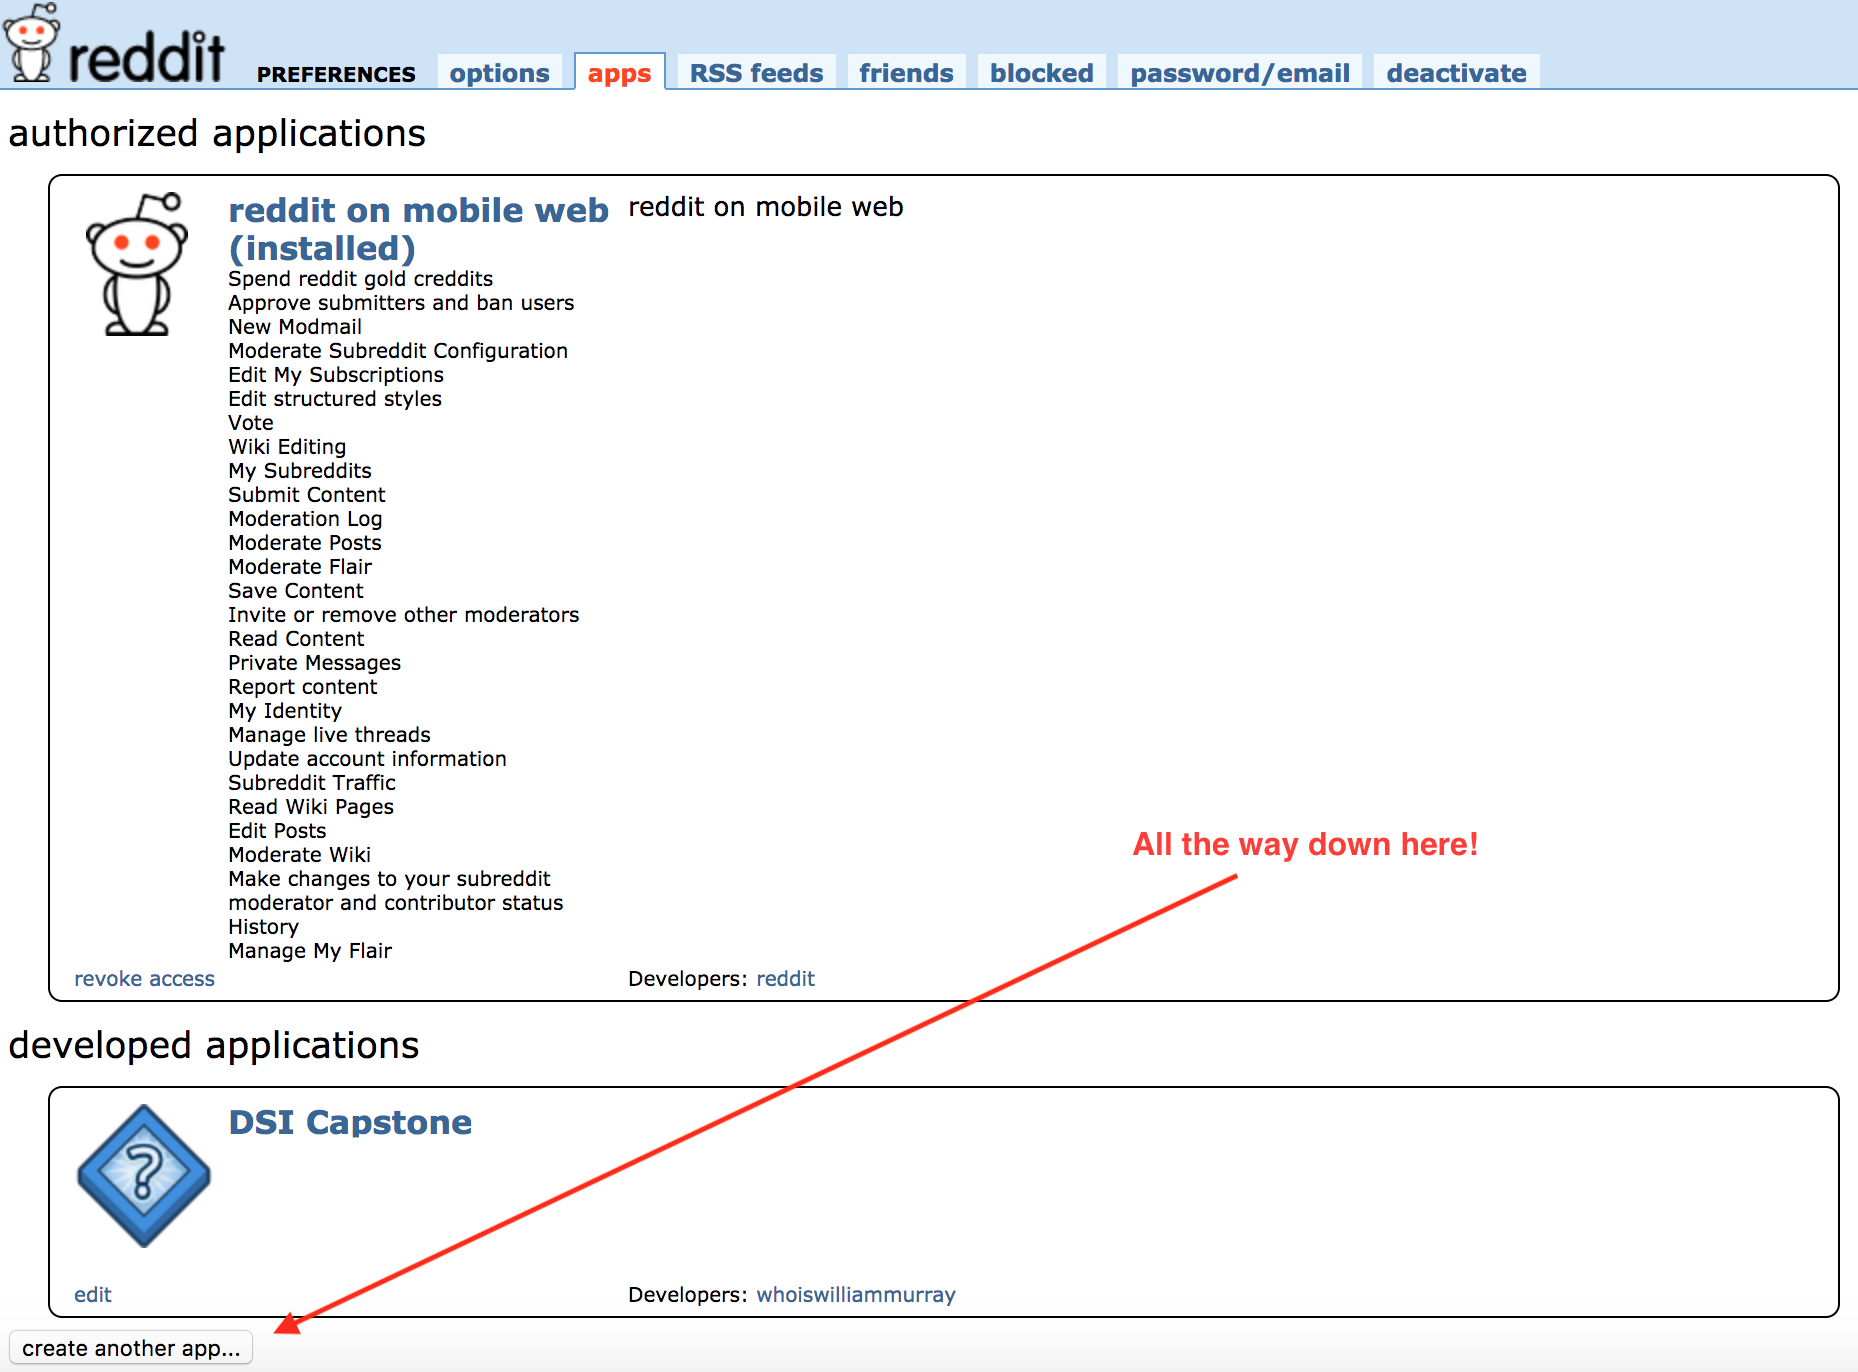
<br>

4. Fill in the below fields (remember to select **script**!) - 


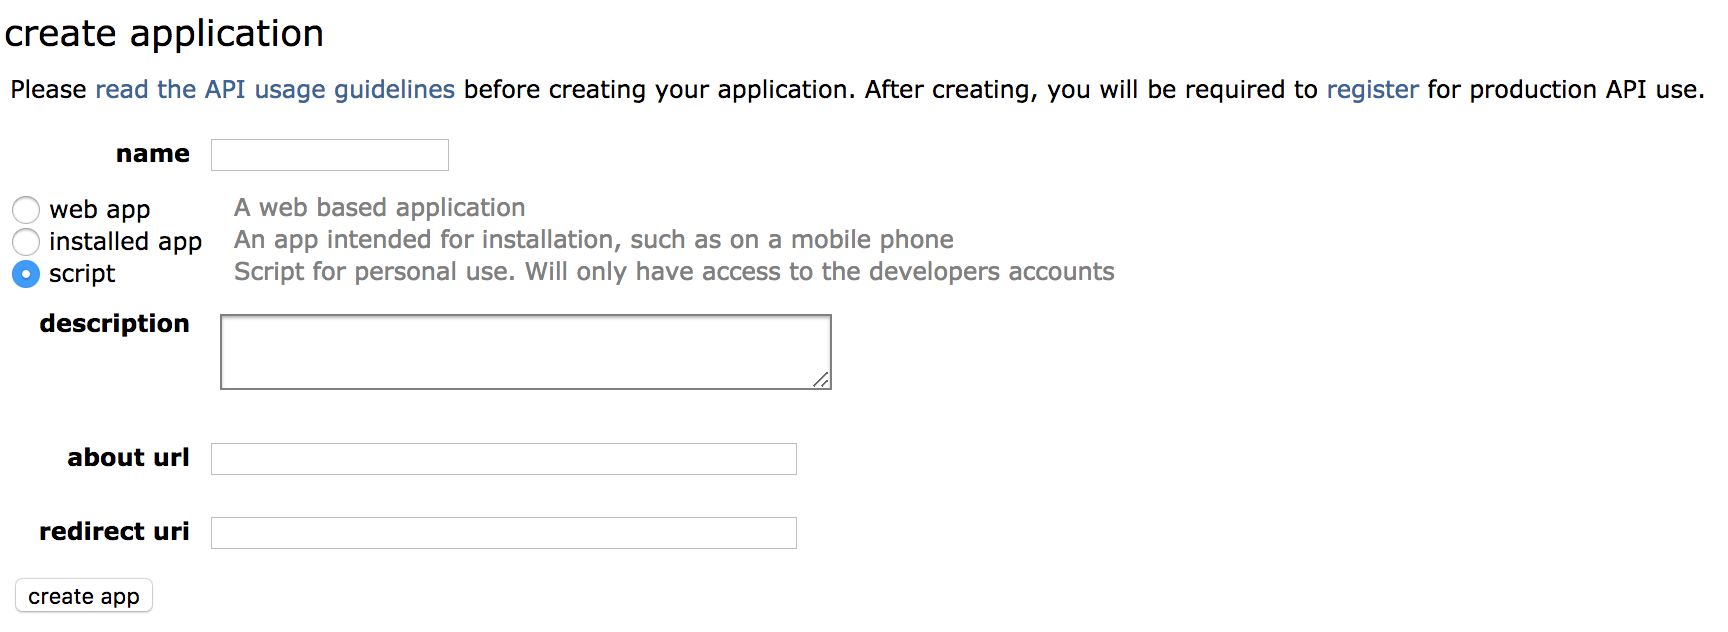

5. Note the **personal use script** and the **secret** codes

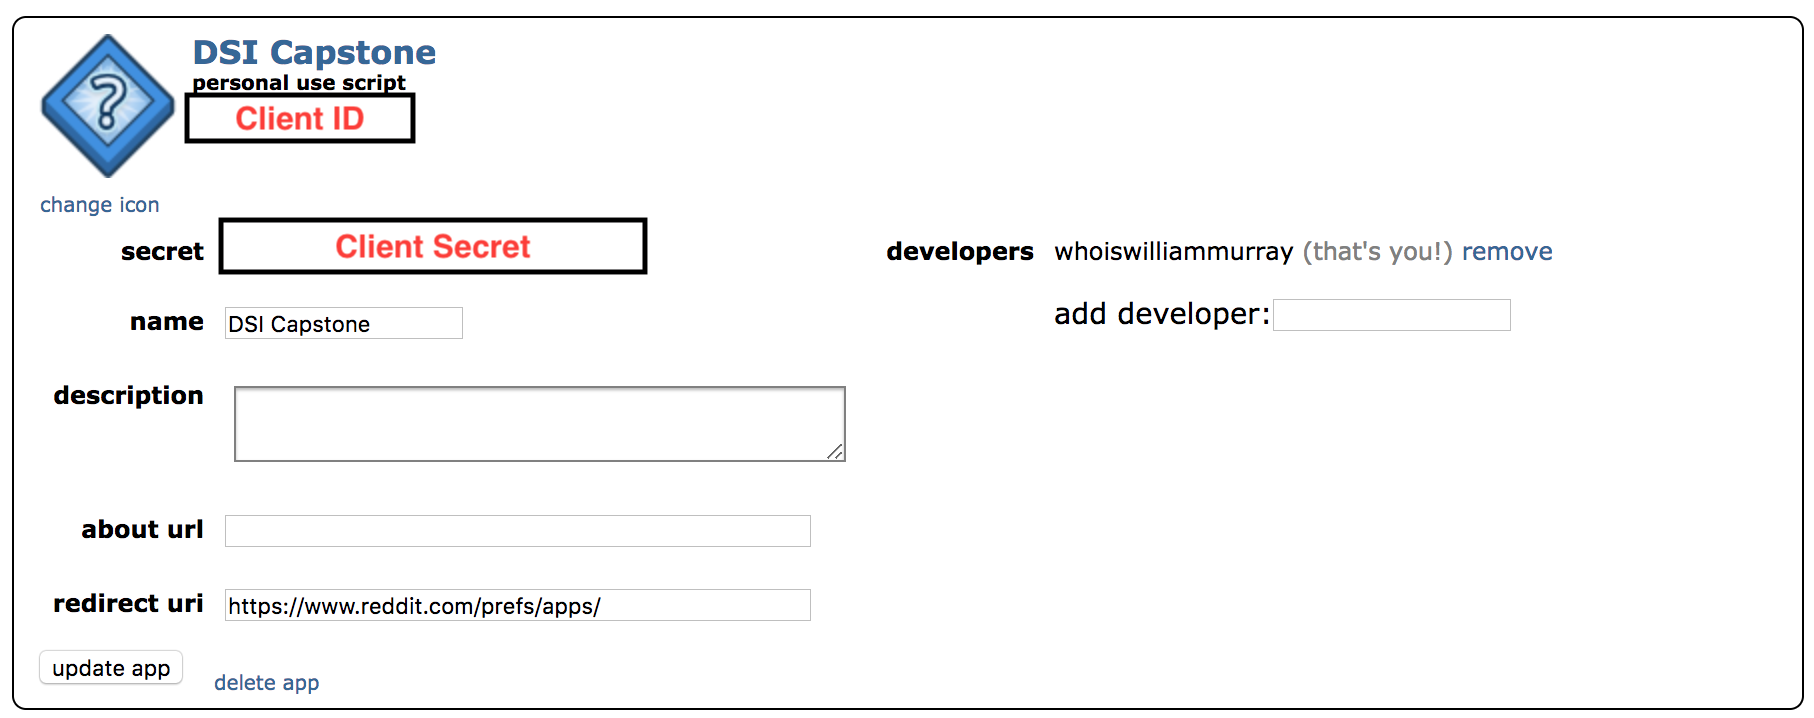

6. Now let's use implement this in python!

In [ ]:
client_id = "Client ID"
client_secret = "Client Secret"
password = "your reddit password" # another good reason for creating a throwaway
user_agent = "your user_agent name"
username = "your reddit username"

<br>

### Since I know we're all sick of talking about cosmetic products, and since it's October, let's use the subreddit r/TwoSentenceHorror as our example!

<img src="WkdLJ5R.jpg" width="500" height="500">

In [34]:
# specify the subreddit you would like to inspect 
tsh = reddit.subreddit("TwoSentenceHorror")

# set the limit to the number of posts you want to view
tsh_new = tsh.new(limit = 15)

In [35]:
# create an empty dictionary for the posts
post_dict = {"title":[],
            "subreddit":[],
            "score":[],
            "id":[],
            "url":[],
            "comms_num": [],
            "created": [],
            "body":[]}

# create an empty dictionary for the comments
comment_dict = {"author": [],
                "body": [],
                "created_utc": [],
                "gilded": [],
                "score": [],
                "parent_id": []}

# create a loop that gets the below parameters 
for submission in tsh_new:
    
    post_dict["title"].append(submission.title)
    post_dict['subreddit'].append(submission.subreddit)
    post_dict["score"].append(submission.score)
    post_dict["id"].append(submission.id)
    post_dict["url"].append(submission.url)
    post_dict["comms_num"].append(submission.num_comments)
    post_dict["created"].append(submission.created)
    post_dict["body"].append(submission.selftext)
    
    df_post = pd.DataFrame(post_dict)
    
    # this lets you look at comments on other comments
    submission.comments.replace_more(limit=None)

    for comment in submission.comments.list():

        comment_dict['author'].append(comment.author)
        comment_dict['body'].append(comment.body)
        comment_dict['created_utc'].append(comment.created_utc)
        comment_dict['gilded'].append(comment.gilded)
        comment_dict['score'].append(comment.score)
        comment_dict['parent_id'].append(comment.parent_id)

        df_comment = pd.DataFrame(comment_dict)
    

In [36]:
df_post.head()

title          subreddit  \
0  You wake up coughing as your house fills with ...  TwoSentenceHorror   
1                               The door flung open.  TwoSentenceHorror   
2  After trying and failing to kill yourself seve...  TwoSentenceHorror   
3  She hacked viciously and hastily at the window...  TwoSentenceHorror   
4       As I happily chewed on my juicy beef burger,  TwoSentenceHorror   

   score      id                                                url  \
0      2  9lm8u9  https://www.reddit.com/r/TwoSentenceHorror/com...   
1      2  9lm4y3  https://www.reddit.com/r/TwoSentenceHorror/com...   
2     28  9llbm5  https://www.reddit.com/r/TwoSentenceHorror/com...   
3      7  9llbcs  https://www.reddit.com/r/TwoSentenceHorror/com...   
4      6  9lktaw  https://www.reddit.com/r/TwoSentenceHorror/com...   

   comms_num       created                                               body  
0          0  1.538775e+09                                                     
1          0  1.538774e+09  And suddenly the last person on Earth was not ...  
2          5  1.538767e+09  Now a champion in the newly popular extreme sp...  
3          0  1.538766e+09  Desperate, the astronaut feared the triple-pan...  
4          5  1.538761e+09  I noticed sandwiched between the top bun and t...

In [37]:
df_comment.head()

author                                               body  \
0  MintClicker                           I would watch this movie   
1   iN5OMANiAC  I leap into the street and dance with joy. A c...   
2     mangonel            Wouldn't this make you the worst at it?   
3  DeseretRain  I actually originally tried to post this in th...   
4  MintClicker  Ah really? If anything this prompt would be mo...   

    created_utc  gilded  score   parent_id  
0  1.538738e+09       0     13   t3_9llbm5  
1  1.538738e+09       0      4   t3_9llbm5  
2  1.538745e+09       0      1   t3_9llbm5  
3  1.538739e+09       0      6  t1_e77i4yn  
4  1.538744e+09       0      4  t1_e77ifxk

In [41]:
# let's take a look!

print(df_post['title'][1])

The door flung open.


In [42]:
print(df_post['body'][1])

And suddenly the last person on Earth was not so lonely anymore. 


<br>

In [43]:
df_post.sort_values(by = ['score'], ascending = False)

title          subreddit  \
10  Humanity celebrated when at last we received a...  TwoSentenceHorror   
2   After trying and failing to kill yourself seve...  TwoSentenceHorror   
6                                  Incorrect password  TwoSentenceHorror   
3   She hacked viciously and hastily at the window...  TwoSentenceHorror   
4        As I happily chewed on my juicy beef burger,  TwoSentenceHorror   
7   Everyone says self harm is terrible and you sh...  TwoSentenceHorror   
11  Hello darkness my old friend, I come to deal w...  TwoSentenceHorror   
9   I'm so relieved they have discovered a treatme...  TwoSentenceHorror   
14  I thought my account was hacked when I saw all...  TwoSentenceHorror   
0   You wake up coughing as your house fills with ...  TwoSentenceHorror   
1                                The door flung open.  TwoSentenceHorror   
13                               I’m All Out Of Love.  TwoSentenceHorror   
5   “Eat, it’s good for you,” the woman smiled to ...  TwoSentenceHorror   
8           I thought I had everything under control.  TwoSentenceHorror   
12               Some boys hug me, some boys kiss me.  TwoSentenceHorror   

    score      id                                                url  \
10     39  9ljheh  https://www.reddit.com/r/TwoSentenceHorror/com...   
2      28  9llbm5  https://www.reddit.com/r/TwoSentenceHorror/com...   
6      15  9lkhxw  https://www.reddit.com/r/TwoSentenceHorror/com...   
3       7  9llbcs  https://www.reddit.com/r/TwoSentenceHorror/com...   
4       6  9lktaw  https://www.reddit.com/r/TwoSentenceHorror/com...   
7       6  9lkhve  https://www.reddit.com/r/TwoSentenceHorror/com...   
11      6  9ljb55  https://www.reddit.com/r/TwoSentenceHorror/com...   
9       5  9ljupx  https://www.reddit.com/r/TwoSentenceHorror/com...   
14      5  9lj2hh  https://www.reddit.com/r/TwoSentenceHorror/com...   
0       2  9lm8u9  https://www.reddit.com/r/TwoSentenceHorror/com...   
1       2  9lm4y3  https://www.reddit.com/r/TwoSentenceHorror/com...   
13      2  9lj9eo  https://www.reddit.com/r/TwoSentenceHorror/com...   
5       1  9lkk4v  https://www.reddit.com/r/TwoSentenceHorror/com...   
8       1  9lkgsy  https://www.reddit.com/r/TwoSentenceHorror/com...   
12      1  9ljarb  https://www.reddit.com/r/TwoSentenceHorror/com...   

    comms_num       created                                               body  
10          6  1.538746e+09                           STOP OR IT WILL HEAR YOU  
2           5  1.538767e+09  Now a champion in the newly popular extreme sp...  
6           1  1.538757e+09                           You have 2 attempts left  
3           0  1.538766e+09  Desperate, the astronaut feared the triple-pan...  
4           5  1.538761e+09  I noticed sandwiched between the top bun and t...  
7           1  1.538757e+09  But when you’re in a body that’s not yours tha...  
11          0  1.538744e+09  Please return my family to life once more, i w...  
9           5  1.538750e+09  Just as the doctor extracts the syringe from m...  
14          9  1.538741e+09  As I spewed a string of expletives, the only w...  
0           0  1.538775e+09                                                     
1           0  1.538774e+09  And suddenly the last person on Earth was not ...  
13          3  1.538743e+09  Someone shoved a knife, took my heart and ripp...  
5           0  1.538758e+09  “Your brother doesn’t have very long anyway, G...  
8           0  1.538757e+09    But no, it seems everything is eating me alive.  
12          0  1.538744e+09  All just end up dead, if the news dont give me...

In [ ]:
print(df_post['title'][10])

In [ ]:
print(df_post['body'][10])

In [ ]:
import datetime as dt

def get_date(created):
    return dt.datetime.fromtimestamp(created)

df['created'] = df['created_utc'].apply(get_date)

df.drop(columns = ['created_utc'], inplace = True)